# Модуль 1 Загрузка, подготовка и предварительное изучение данных 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

## 1. ЗАГРУЗКА ДАННЫХ

В задании представлено 3 dat-файла с данными по прозвучиванию, ниже представлен код последовательной загрузки каждого файла и сохранения всей информации в формате .json

In [4]:
data_names = ['SOP1.dat', 'SOP2.dat', 'SOP3.dat']
all_data = {}
for file in data_names:
    path_to_data = './data/' + file
    f = open(path_to_data).read()
    all_data[file] = f.split('\n')

Размеры каждого файла в строках:

In [7]:
len(all_data['SOP1.dat']), len(all_data['SOP2.dat']), len(all_data['SOP3.dat'])

(1044, 1041, 1040)

In [6]:
with open('all_data.json', 'w') as f:
    json.dump(all_data, f)

Первая строка файла является служебной и содержит информацию о номере сварного шва, о приборе контроля, дате и времени контроля, температуре и пр. На основании изучения структуры файлов было определено, что техническая информация носит избыточный характер при анализе данных, поэтому её необходимо удалить

In [9]:
for data in data_names:
    all_data[data] = all_data[data][1:-1]

In [23]:
df = pd.DataFrame(columns=['filename', 'index'] + [f'schema_{i}' for i in range(1, 17)])
for data in data_names:
    for values in all_data[data]:
        values_list = values.split(' ')
        values_list = list(map(int, values_list))
        df.loc[len(df), :] = [data] + values_list
df.head()

,filename,index,schema_1,schema_2,schema_3,schema_4,schema_5,schema_6,schema_7,schema_8,schema_9,schema_10,schema_11,schema_12,schema_13,schema_14,schema_15,schema_16
0,SOP1.dat,1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39
1,SOP1.dat,2,0,23,190,27,22,29,0,0,255,147,56,95,156,223,13,27
2,SOP1.dat,3,1,0,188,24,10,13,0,0,255,145,59,40,172,254,10,0
3,SOP1.dat,4,5,0,183,26,6,1,0,0,255,153,66,22,172,255,7,0
4,SOP1.dat,5,4,0,188,32,4,0,0,0,255,157,62,18,170,255,14,21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 0 to 3118
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   3119 non-null   object
 1   index      3119 non-null   object
 2   schema_1   3119 non-null   object
 3   schema_2   3119 non-null   object
 4   schema_3   3119 non-null   object
 5   schema_4   3119 non-null   object
 6   schema_5   3119 non-null   object
 7   schema_6   3119 non-null   object
 8   schema_7   3119 non-null   object
 9   schema_8   3119 non-null   object
 10  schema_9   3119 non-null   object
 11  schema_10  3119 non-null   object
 12  schema_11  3119 non-null   object
 13  schema_12  3119 non-null   object
 14  schema_13  3119 non-null   object
 15  schema_14  3119 non-null   object
 16  schema_15  3119 non-null   object
 17  schema_16  3119 non-null   object
dtypes: object(18)
memory usage: 527.5+ KB


На основании информации о типах данных принято решение перековертировать значения схем прозвучивания в целочисленный формат, что позволит уменьшить использование памяти 

In [13]:
numeric_columns = [col for col in df.columns if col not in ['filename', 'index']]
df[numeric_columns] = df[numeric_columns].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 0 to 3118
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   3119 non-null   object
 1   index      3119 non-null   object
 2   schema_1   3119 non-null   int32 
 3   schema_2   3119 non-null   int32 
 4   schema_3   3119 non-null   int32 
 5   schema_4   3119 non-null   int32 
 6   schema_5   3119 non-null   int32 
 7   schema_6   3119 non-null   int32 
 8   schema_7   3119 non-null   int32 
 9   schema_8   3119 non-null   int32 
 10  schema_9   3119 non-null   int32 
 11  schema_10  3119 non-null   int32 
 12  schema_11  3119 non-null   int32 
 13  schema_12  3119 non-null   int32 
 14  schema_13  3119 non-null   int32 
 15  schema_14  3119 non-null   int32 
 16  schema_15  3119 non-null   int32 
 17  schema_16  3119 non-null   int32 
dtypes: int32(16), object(2)
memory usage: 332.6+ KB


Сохранение датасета:

In [24]:
df.to_csv('df.csv', index=False)

## 2. ПРЕДВАРИТЕЛЬНОЕ ИЗУЧЕНИЕ

Ниже представлен анализ переменных в табличном виде (максимальное, минимальное значение, среднеквадратичное отклонение, медиана, квартили) 

In [14]:
df.describe()

,schema_1,schema_2,schema_3,schema_4,schema_5,schema_6,schema_7,schema_8,schema_9,schema_10,schema_11,schema_12,schema_13,schema_14,schema_15,schema_16
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000
mean,0.655338,9.934594,22.508176,15.734530,104.768836,90.223148,0.759538,1.169926,60.327028,69.916319,5.676819,36.711446,66.393075,87.773004,9.073421,17.296569
std,4.290168,33.041806,50.705091,45.931749,79.690482,75.406269,5.750133,8.016499,69.929916,76.351772,18.702236,60.009745,59.647081,86.600906,16.997662,24.390851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,37.000000,23.000000,0.000000,0.000000,13.000000,19.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,93.000000,78.000000,0.000000,0.000000,35.000000,42.000000,0.000000,15.000000,57.000000,67.000000,0.000000,10.000000
75%,0.000000,0.000000,18.000000,0.000000,162.000000,142.000000,0.000000,0.000000,78.000000,84.000000,0.000000,40.000000,105.000000,150.000000,11.000000,25.000000
max,48.000000,255.000000,255.000000,255.000000,255.000000,255.000000,152.000000,123.000000,255.000000,255.000000,147.000000,255.000000,255.000000,255.000000,163.000000,255.000000


Графическая информация о статистиках представлена на рисунке ниже. Здесь по диагонали отражены распределения значений схем прозвучивания, в остальных ячейках - зависимости в координатах схем прозвучивания

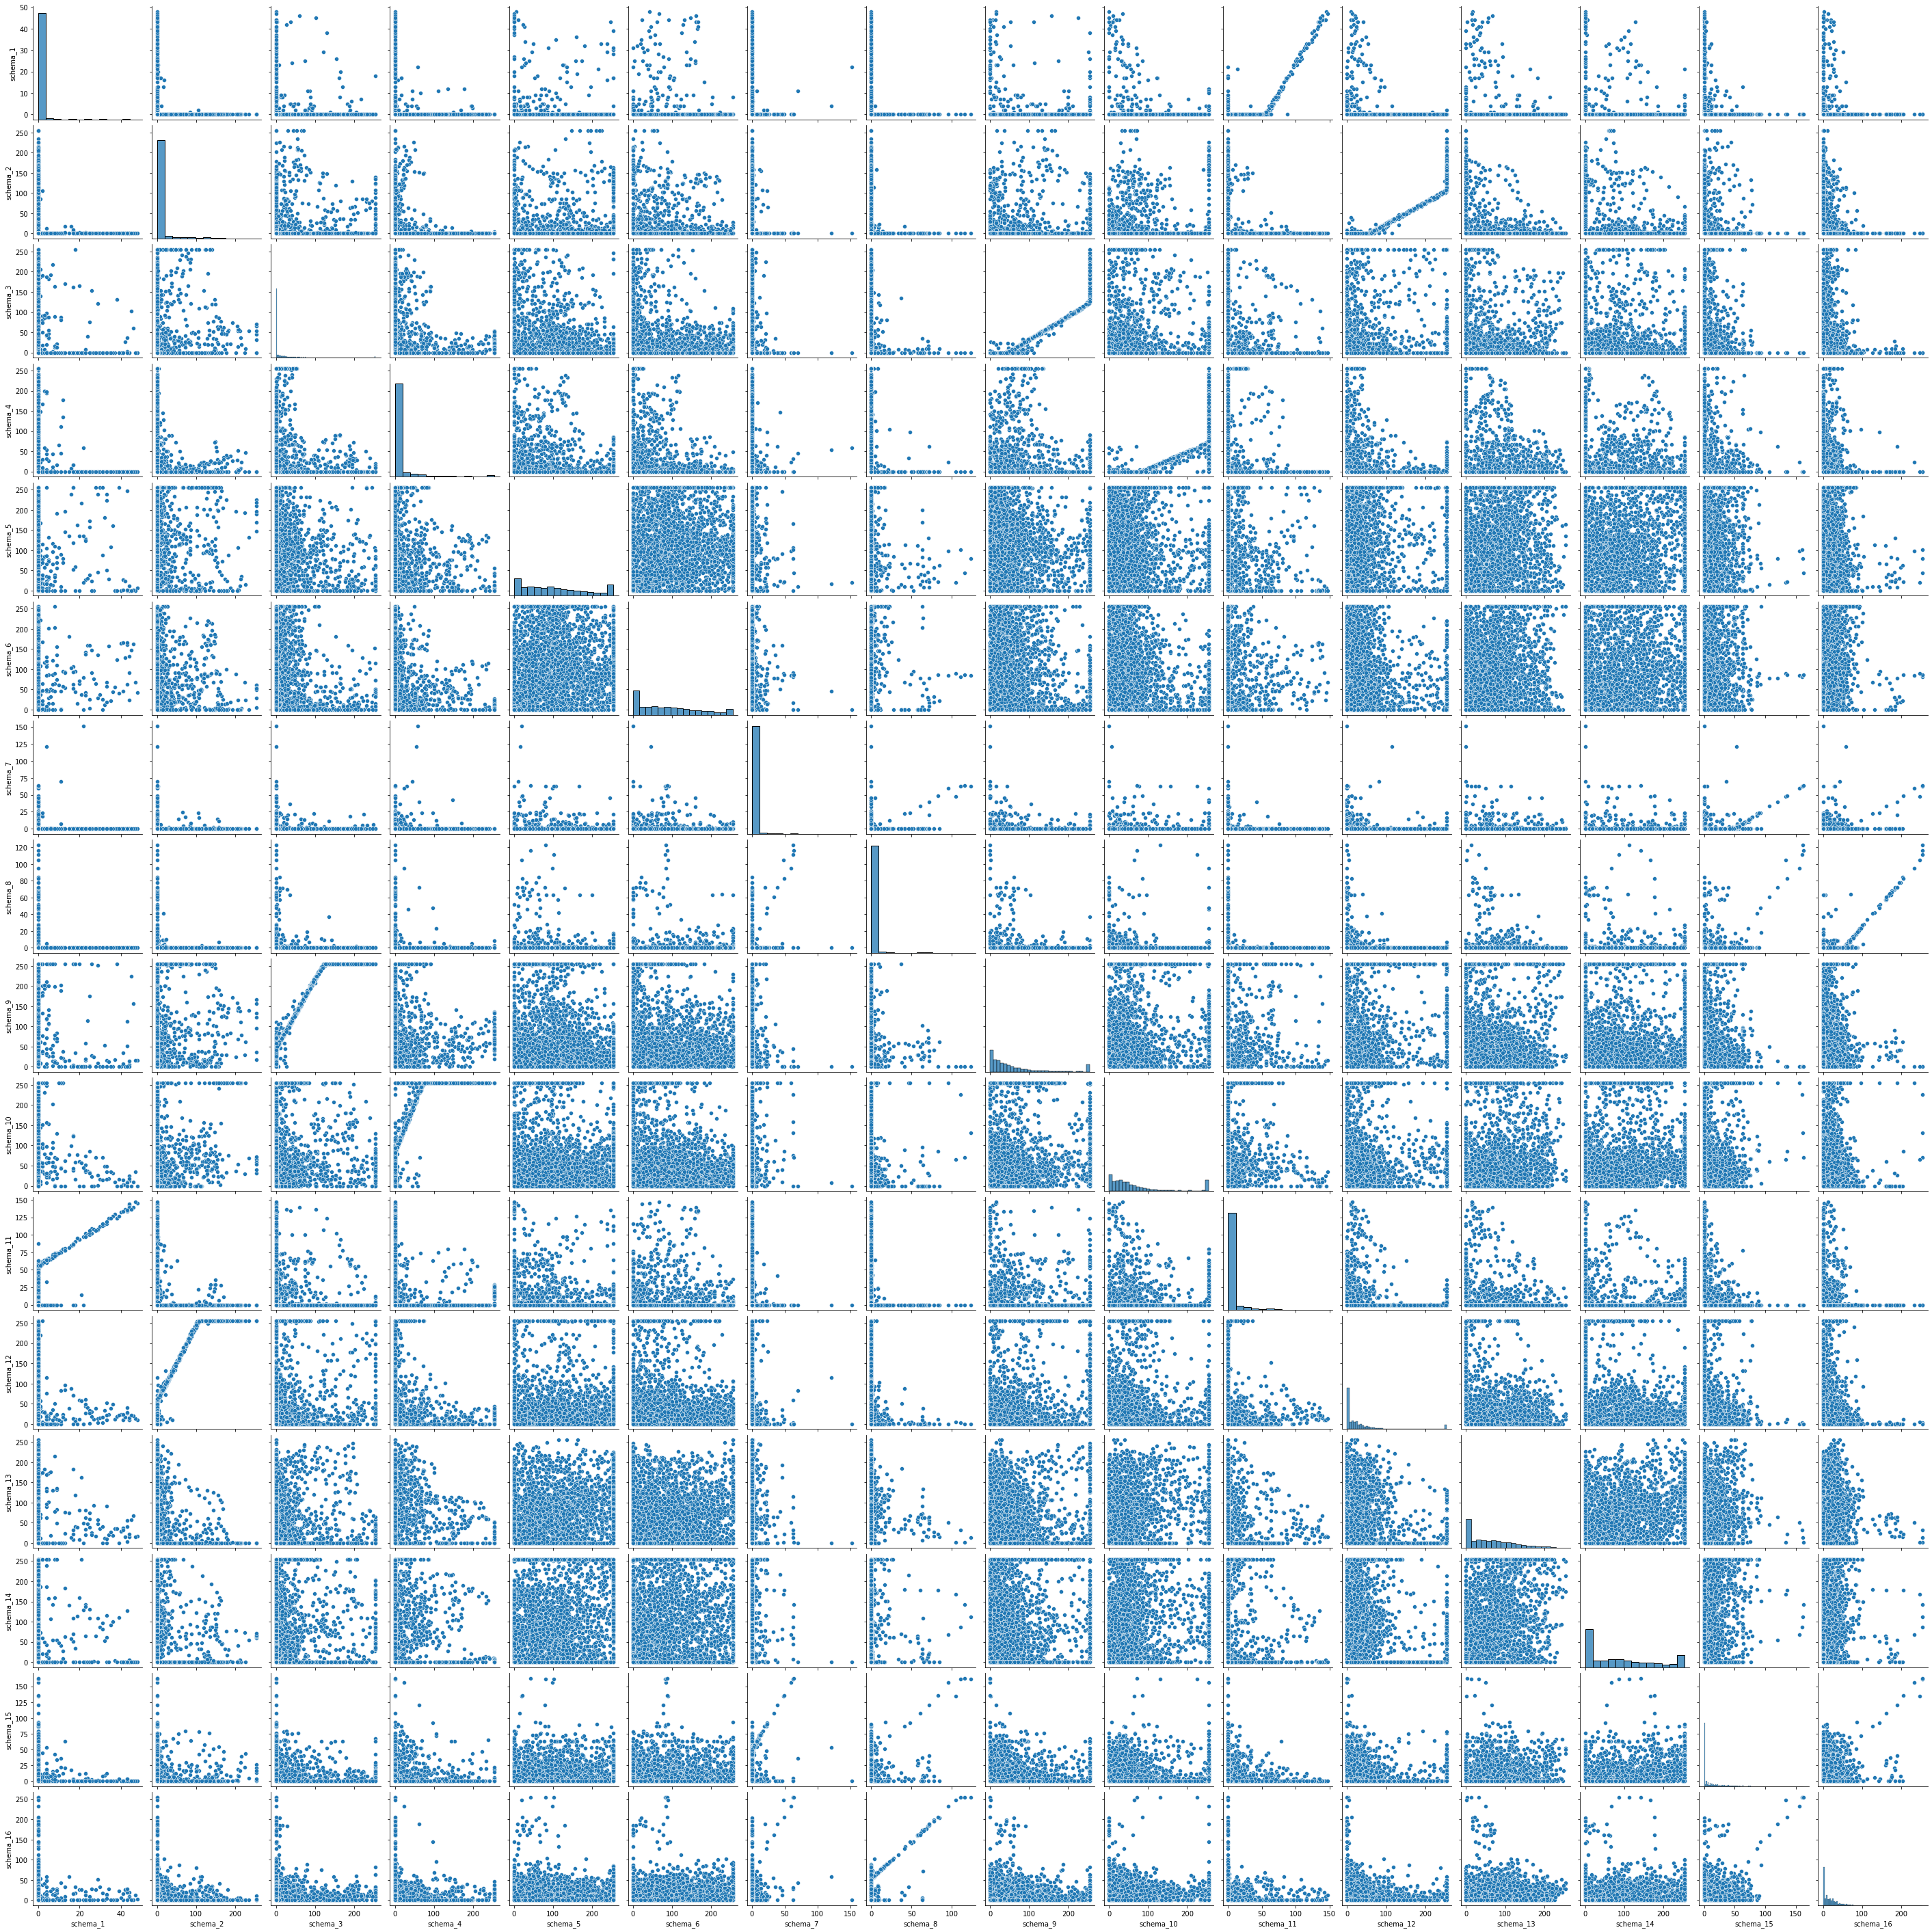

In [16]:
sns.pairplot(df[numeric_columns])

Боксплоты ("ящики с усами") позволяют судить о распределении величин и выбросах

<AxesSubplot:>

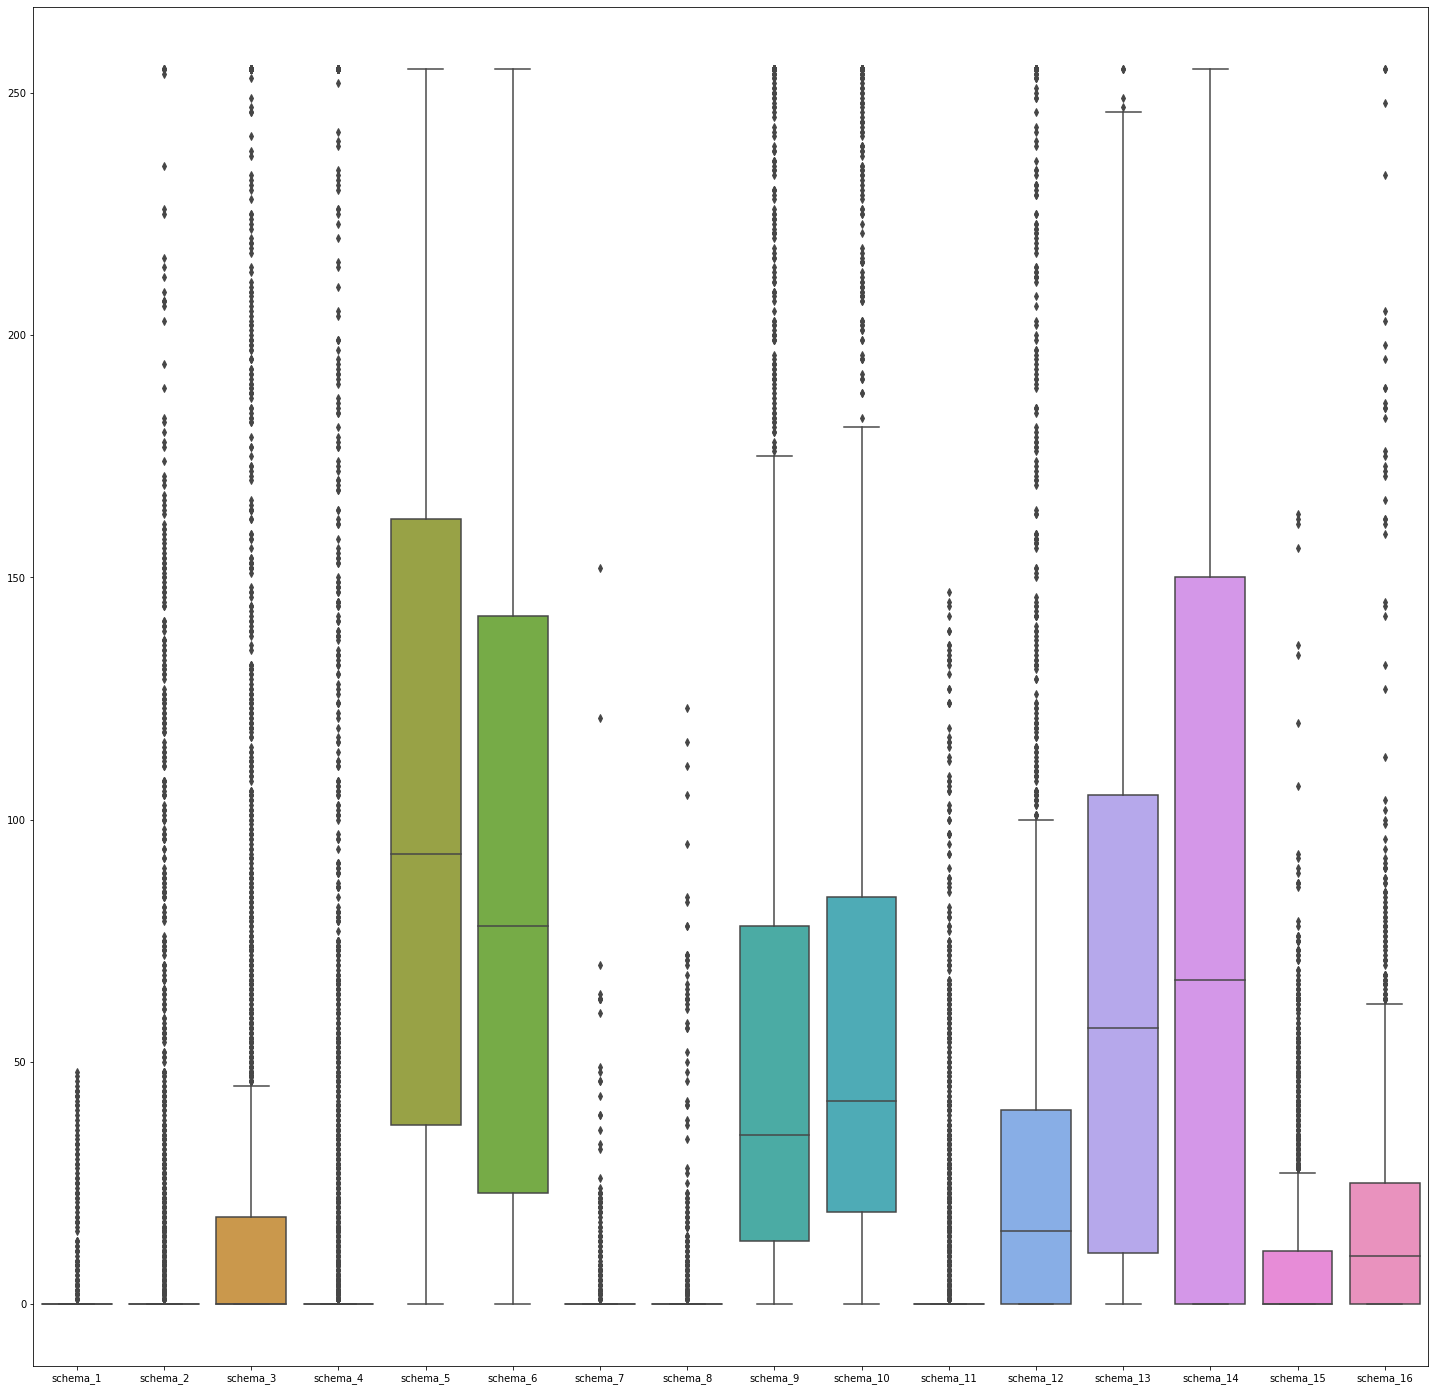

In [22]:
plt.figure(figsize=(25, 25))
sns.boxplot(data=df[numeric_columns])

## 3. ОПРЕДЕЛЕНИЕ МЕТОДОВ КОНТРОЛЯ 

<p> На основании анализа распределений, отраженных выше, было принято решение, что: </p>
<p> - эхо-контактными являются схемы 2, 3, 4, 9, 10, 16. В постановке задачи сказано, что усиление сигнала на 6 дБ позволяет легче выделять дефекты, следовательно, такие схемы визуально отличаются большими значениями в сравнении с обычными эхо-методами, поэтому на боксплотах и графиках они характеризуются значениями до 255 единиц  </p>
<p> - теневыми являются схемы 5, 6, 13, 14. Их распределение близко к равномерному, при этом они характеризуются маленьким наличием отклонений (в пределах 1,5 интерквартильных размахов), значения равномерно распределены от 0 до 255 </p>
<p> - эхо-методами являются схемы 1, 7, 8, 11, 12, 15. Они характеризуются меньшими значениями, поскольку не усилены, в отличие от эхо-контактных методов, при этом большинство значений находятся в интервале от 0 до 50 с медианой, тяготеющей к 0 </p>